In [18]:
#!pip install sentinelsat

In [19]:
#!pip install folium

In [2]:
#!pip install geopandas

In [47]:
#!pip install georaster

In [48]:
#! pip install --upgrade matplotlib 

In [53]:
!pip install seaborn 

In [54]:
from sentinelsat import SentinelAPI
import rasterio
import rasterio.mask as mk
import rasterio as rio
from rasterio.plot import show
import numpy as np
from matplotlib.pyplot import *

In [55]:
user = 'ishango1' 
password = 'ishango1' 
api = SentinelAPI(user,password, 'https://scihub.copernicus.eu/dhus')

In [56]:
import geopandas as gpd
import folium 

nReserve = gpd.read_file('C:/Users/jeannine/Documents/code/MWI_adm1.shp')

m = folium.Map([-13.2512161,34.3015278], zoom_start=7)
folium.GeoJson(nReserve).add_to(m)
m

In [57]:
from sentinelsat.sentinel import geojson_to_wkt, read_geojson

In [58]:
footp = "C:/Users/jeannine/Documents/code/map8.geojson"

footprint = geojson_to_wkt(read_geojson(footp))

In [59]:
Products = api.query(footprint,
                     date = ('20210825', '20210925'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,50)
                    )

#print((Products))

Querying products:  27%|##6       | 100/372 [00:00<?, ?product/s]

In [60]:
products_gdf = api.to_geodataframe(Products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted.head(2)

title  \
074582b9-39f1-4a61-984b-9c9027c64247  S2A_MSIL2A_20210826T073611_N0301_R092_T36LZK_2...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  S2A_MSIL2A_20210829T074611_N0301_R135_T36LXN_2...   

                                                                                   link  \
074582b9-39f1-4a61-984b-9c9027c64247  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                       link_alternative  \
074582b9-39f1-4a61-984b-9c9027c64247  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                              link_icon  \
074582b9-39f1-4a61-984b-9c9027c64247  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                                summary  \
074582b9-39f1-4a61-984b-9c9027c64247  Date: 2021-08-26T07:36:11.024Z, Instrument: MS...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  Date: 2021-08-29T07:46:11.024Z, Instrument: MS...   

                                     ondemand      generationdate  \
074582b9-39f1-4a61-984b-9c9027c64247    false 2021-08-26 10:26:24   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b    false 2021-08-29 10:26:24   

                                               beginposition  \
074582b9-39f1-4a61-984b-9c9027c64247 2021-08-26 07:36:11.024   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b 2021-08-29 07:46:11.024   

                                                 endposition  \
074582b9-39f1-4a61-984b-9c9027c64247 2021-08-26 07:36:11.024   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b 2021-08-29 07:46:11.024   

                                               ingestiondate  ...  \
074582b9-39f1-4a61-984b-9c9027c64247 2021-08-26 14:00:12.958  ...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b 2021-08-29 14:04:17.964  ...   

                                      producttype  platformidentifier  \
074582b9-39f1-4a61-984b-9c9027c64247      S2MSI2A           2015-028A   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b      S2MSI2A           2015-028A   

                                      orbitdirection  \
074582b9-39f1-4a61-984b-9c9027c64247      DESCENDING   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b      DESCENDING   

                                      platformserialidentifier  \
074582b9-39f1-4a61-984b-9c9027c64247               Sentinel-2A   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b               Sentinel-2A   

                                      processinglevel  \
074582b9-39f1-4a61-984b-9c9027c64247         Level-2A   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b         Level-2A   

                                                                    datastripidentifier  \
074582b9-39f1-4a61-984b-9c9027c64247  S2A_OPER_MSI_L2A_DS_VGS1_20210826T102624_S2021...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  S2A_OPER_MSI_L2A_DS_VGS1_20210829T102624_S2021...   

                                                                      granuleidentifier  \
074582b9-39f1-4a61-984b-9c9027c64247  S2A_OPER_MSI_L2A_TL_VGS1_20210826T102624_A0322...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  S2A_OPER_MSI_L2A_TL_VGS1_20210829T102624_A0323...   

                                                                             identifier  \
074582b9-39f1-4a61-984b-9c9027c64247  S2A_MSIL2A_20210826T073611_N0301_R092_T36LZK_2...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  S2A_MSIL2A_20210829T074611_N0301_R135_T36LXN_2...   

                                                                      uuid  \
074582b9-39f1-4a61-984b-9c9027c64247  074582b9-39f1-4a61-984b-9c9027c64247   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  f89d9b8c-0065-4c03-9f5b-868f8fa5045b   

                                                                               geometry  
074

<AxesSubplot:>

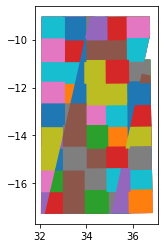

In [61]:
areas = api.to_geodataframe(Products)
areas.plot(column='uuid', cmap=None)

In [62]:
len(products_gdf)

372

In [63]:
# This function check if the products ID is available online
# if true --> True
# if False --> False
def checkProductID():
    for i in range(len(products_gdf['uuid'])):
        product_id = api.get_product_odata(products_gdf['uuid'][i])
        for j in product_id.keys():
            if j == 'Online':
                print(f"For the index = {i} , the product {products_gdf['uuid'][i]}"
                      f" is online True or False? :  {product_id[j]}")

In [64]:
checkProductID()

For the index = 0 , the product ec592c34-2635-44ea-9ea4-cc73df0a5463 is online True or False? :  True
For the index = 1 , the product 37e3203f-fd50-423f-a0f6-d0a98c41f3d0 is online True or False? :  True
For the index = 2 , the product 3a857381-67b0-41dc-ae2f-793bfde59d5f is online True or False? :  True
For the index = 3 , the product b0983502-9d17-48fb-b7d9-b080298f948d is online True or False? :  True
For the index = 4 , the product 5ac673f2-ccae-42c3-bde7-2f953c7cb952 is online True or False? :  True
For the index = 5 , the product 29cdb869-948e-4328-a854-01ee0ffc8175 is online True or False? :  True
For the index = 6 , the product 13494c02-c67f-4261-884e-4ea265b7db2b is online True or False? :  True
For the index = 7 , the product b4b4cacc-ee9e-4a17-93e4-6d2a5abb226d is online True or False? :  True
For the index = 8 , the product 20409dfd-c8ab-443d-9bb4-5cb3925471b7 is online True or False? :  True
For the index = 9 , the product 28a319c9-9aa9-480f-9df4-5d2cd4c4e30b is online Tru

For the index = 80 , the product 6dd8466a-861c-4815-b6a6-49b5dcf2c95f is online True or False? :  True
For the index = 81 , the product c00b9ec7-09f5-4727-900e-3a0b3f4ba56a is online True or False? :  True
For the index = 82 , the product 43badfc3-22c3-49d1-81f5-6c9589be2393 is online True or False? :  True
For the index = 83 , the product 8398b6b8-0313-41d6-a4bf-f2f106efcd42 is online True or False? :  True
For the index = 84 , the product d3e5da68-6e4a-4334-a488-2d4d43a54e0c is online True or False? :  True
For the index = 85 , the product 5a919fa3-42b7-41d8-9dd3-38148a78d89a is online True or False? :  True
For the index = 86 , the product f3f461ba-52b4-4e31-9ace-56a8b33e88c5 is online True or False? :  True
For the index = 87 , the product 3feb2caf-771b-4b5f-95bd-d922fa3647da is online True or False? :  True
For the index = 88 , the product a68bfa1f-3b63-4e7e-9f52-7cfc9a1221fa is online True or False? :  True
For the index = 89 , the product 1e1292c6-efbf-4dd2-888b-596afaba3ee9 is 

For the index = 159 , the product 37d53f9c-c702-41df-ba47-532a1a39eeee is online True or False? :  True
For the index = 160 , the product 86bccdc8-e96d-4800-beca-06a0240653b6 is online True or False? :  True
For the index = 161 , the product 7c7325fe-b0bf-427f-a7ec-07d51d0c026c is online True or False? :  True
For the index = 162 , the product d1bc22b3-c304-44da-ac55-32de7e2dfd23 is online True or False? :  True
For the index = 163 , the product c1921b78-a92e-4f80-820a-302d4487f0ff is online True or False? :  True
For the index = 164 , the product e6b17d28-34fb-4ae1-b9bf-c7a3b28fded3 is online True or False? :  True
For the index = 165 , the product c0a4d816-98c7-4b20-a41a-822ddcd21c3f is online True or False? :  True
For the index = 166 , the product 974e36a5-8834-4dea-a4ed-4958c4f4e1d3 is online True or False? :  True
For the index = 167 , the product db83e6f0-c07c-4aac-8bd3-f2cec448f091 is online True or False? :  True
For the index = 168 , the product e2b5a69e-5b1c-4f0f-8ab0-48be62

For the index = 238 , the product 7ec019ae-713b-40af-af24-aedaae0853c3 is online True or False? :  True
For the index = 239 , the product cb1813c8-9d45-463f-8124-ade556d95913 is online True or False? :  True
For the index = 240 , the product b31bfb38-8617-47f8-8d80-21966845ff85 is online True or False? :  True
For the index = 241 , the product 6b4df6ee-712d-42d0-b31c-7a7bc8688966 is online True or False? :  True
For the index = 242 , the product ab4d3659-4c7a-498e-a622-6a10936fe4f8 is online True or False? :  True
For the index = 243 , the product 7144bc91-a913-4ed2-8449-f87b3d3956d7 is online True or False? :  True
For the index = 244 , the product 5569af62-85ac-43aa-833f-79d96715962b is online True or False? :  True
For the index = 245 , the product 1f4a77fd-be87-4701-8247-48f9544c2777 is online True or False? :  True
For the index = 246 , the product c9a42828-0d25-4005-99cf-c9eeb603162b is online True or False? :  True
For the index = 247 , the product 2da11dc7-7452-4fc3-bac5-0221d5

For the index = 317 , the product caf1a65c-5df8-4ecc-b326-12ced174b93d is online True or False? :  True
For the index = 318 , the product 911f6d22-58b0-4a9b-ae57-e9b0ae96739e is online True or False? :  True
For the index = 319 , the product 12086742-6e56-41b0-8666-a900dfea94b6 is online True or False? :  True
For the index = 320 , the product b890e92a-9cfa-48d0-a0a5-cd1d45c92ae3 is online True or False? :  True
For the index = 321 , the product f89d9b8c-0065-4c03-9f5b-868f8fa5045b is online True or False? :  True
For the index = 322 , the product b9a39d4c-f9da-478c-b45c-f8688be4949b is online True or False? :  True
For the index = 323 , the product 454a1474-916a-4379-856a-3484582d0707 is online True or False? :  True
For the index = 324 , the product d9ffc828-6cfd-4e86-96bc-e6d7fb339692 is online True or False? :  True
For the index = 325 , the product 5ce61c49-17f8-4f51-b2b7-5c18f0d45aba is online True or False? :  True
For the index = 326 , the product 68113f24-7ece-43e3-976b-319ef1

C:\Users\jeannine\AppData\Local\Temp/ipykernel_6888/2464220507.py:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)


ec592c34-2635-44ea-9ea4-cc73df0a5463    Annotation(34.0928, -9.49006, 'ec592c34-2635-4...
37e3203f-fd50-423f-a0f6-d0a98c41f3d0    Annotation(32.5863, -11.3516, '37e3203f-fd50-4...
3a857381-67b0-41dc-ae2f-793bfde59d5f    Annotation(34.003, -10.3231, '3a857381-67b0-41...
b0983502-9d17-48fb-b7d9-b080298f948d    Annotation(33.4987, -10.4445, 'b0983502-9d17-4...
5ac673f2-ccae-42c3-bde7-2f953c7cb952    Annotation(33.1392, -13.9952, '5ac673f2-ccae-4...
                                                              ...                        
4ee9125f-8ee7-4dec-828d-9a20c6d41d34    Annotation(35.335, -11.3426, '4ee9125f-8ee7-4d...
8fb47d2b-4c15-4452-98ba-cb618e0dc778    Annotation(33.5203, -14.0728, '8fb47d2b-4c15-4...
b827694f-ba9e-427c-ac1d-98776f643bfc    Annotation(33.5104, -14.9679, 'b827694f-ba9e-4...
ee066186-e604-41d6-ba82-987ea820a749    Annotation(35.1296, -15.825, 'ee066186-e604-41...
074582b9-39f1-4a61-984b-9c9027c64247    Annotation(35.8163, -13.7338, '074582b9-39f1-4...
Length: 37

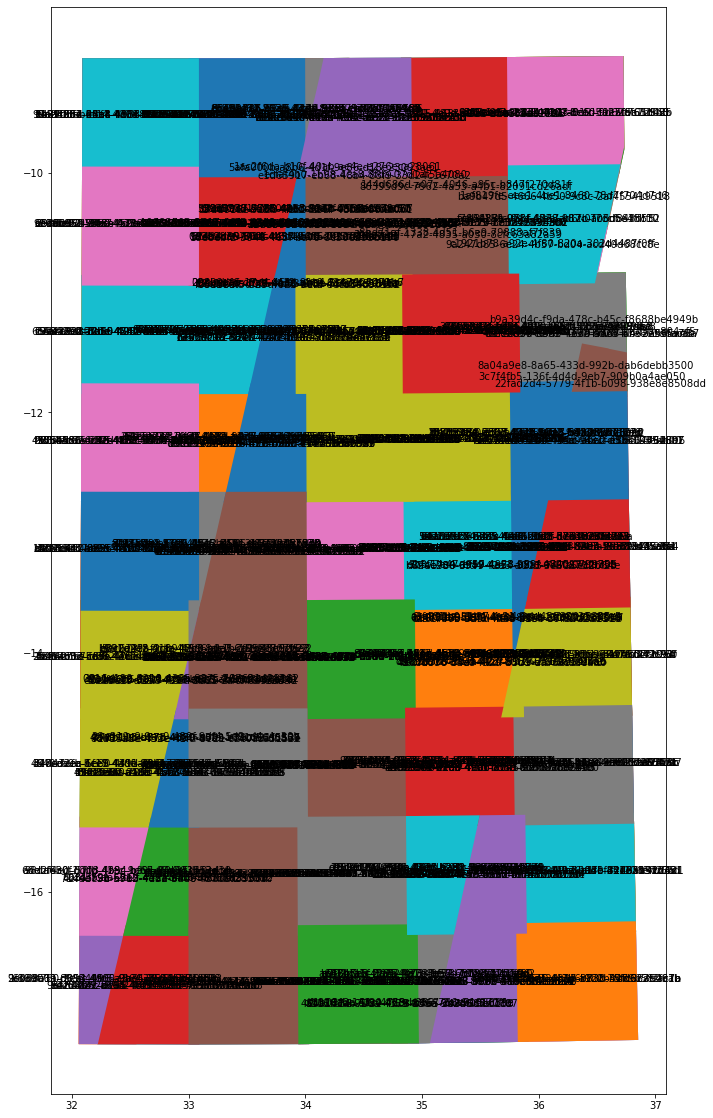

In [65]:
#areas.uuid
ax = areas.plot(column='uuid', cmap=None, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [66]:
import matplotlib.pyplot as plt

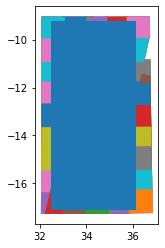

In [67]:
gdf2 = gpd.read_file(footp)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)

plt.show()

In [68]:
api.get_product_odata('ec592c34-2635-44ea-9ea4-cc73df0a5463')

{'id': 'ec592c34-2635-44ea-9ea4-cc73df0a5463',
 'title': 'S2B_MSIL2A_20210923T074629_N0301_R135_T36LXQ_20210923T102602',
 'size': 413720258,
 'md5': 'dc780ab511f37fc1c3b5b17eb4d59f6a',
 'date': datetime.datetime(2021, 9, 23, 7, 46, 29, 24000),
 'footprint': 'POLYGON((34.37196540871501 -9.04329527681312,34.34579320229438 -9.155413593796217,34.314015479200705 -9.304039812193892,34.28244999891731 -9.452691149496877,34.25033295888691 -9.60122406985796,34.21918499045783 -9.750146745073762,34.18652918673571 -9.898717502405612,34.15615000796337 -10.037027585462862,33.91251608314126 -10.03806585104805,33.90987862328547 -9.045071505065456,34.37196540871501 -9.04329527681312))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ec592c34-2635-44ea-9ea4-cc73df0a5463')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2021, 9, 23, 12, 31, 22, 289000),
 'Ingestion Date': datetime.datetime(2021, 9, 23, 12, 31, 4, 130000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/od

In [69]:
api.download("ec592c34-2635-44ea-9ea4-cc73df0a5463")

{'id': 'ec592c34-2635-44ea-9ea4-cc73df0a5463',
 'title': 'S2B_MSIL2A_20210923T074629_N0301_R135_T36LXQ_20210923T102602',
 'size': 413720258,
 'md5': 'dc780ab511f37fc1c3b5b17eb4d59f6a',
 'date': datetime.datetime(2021, 9, 23, 7, 46, 29, 24000),
 'footprint': 'POLYGON((34.37196540871501 -9.04329527681312,34.34579320229438 -9.155413593796217,34.314015479200705 -9.304039812193892,34.28244999891731 -9.452691149496877,34.25033295888691 -9.60122406985796,34.21918499045783 -9.750146745073762,34.18652918673571 -9.898717502405612,34.15615000796337 -10.037027585462862,33.91251608314126 -10.03806585104805,33.90987862328547 -9.045071505065456,34.37196540871501 -9.04329527681312))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ec592c34-2635-44ea-9ea4-cc73df0a5463')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2021, 9, 23, 12, 31, 22, 289000),
 'Ingestion Date': datetime.datetime(2021, 9, 23, 12, 31, 4, 130000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/od

In [70]:
# Open Bands 4, 3 and 2 with Rasterio
#R10 = 'C:/Users/jeannine/Documents/code/S2B_MSIL2A_20210920T073609_N0301_R092_T36LZN_20210920T110122.zip.SAFE/GRANULE/L2A_T36LZN_A023713_20210920T080048/IMG_DATA/R10m'
R10 = 'C:/Users/jeannine/Documents/code/S2B_MSIL2A_20210923T074629_N0301_R135_T36LXQ_20210923T102602.SAFE/GRANULE/L2A_T36LXQ_A023756_20210923T081217/IMG_DATA/R10m'
b4 = rio.open(R10+'/T36LXQ_20210923T074629_B04_10m.jp2', driver='JP2OpenJPEG')
b3 = rio.open(R10+'/T36LXQ_20210923T074629_B03_10m.jp2', driver='JP2OpenJPEG')
b2 = rio.open(R10+'/T36LXQ_20210923T074629_B02_10m.jp2', driver='JP2OpenJPEG')
b8 = rio.open(R10+'/T36LXQ_20210923T074629_B08_10m.jp2', driver='JP2OpenJPEG')
#b12 = rio.open(R10+'/T36LXQ_20210923T074629_B012_10m.jp2', driver='JP2OpenJPEG')


# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b8.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.write(b8.read(1),3) 
    rgb.close()

CPLE_AppDefinedError: Deleting RGB.tiff failed: Permission denied

In [ ]:
src = rio.open("C:/Users/jeannine/Documents/code/RGB.tiff")
plt.imshow(src.read(1), cmap='pink')
plt.show()

In [ ]:
from rasterio import plot

In [ ]:
plot.show(b4)

In [ ]:
plot.show(b8)

In [ ]:
plot.show(b2)

In [ ]:
b8.transform

In [ ]:
b8.read(1)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,7))
plot.show(b2, ax=ax1, cmap='Blues')
plot.show(b3, ax=ax2, cmap='Greens')
plot.show(b4, ax=ax3, cmap='Reds')
#plot.show(b8, ax=ax4, cmap='Nirs')
fig.tight_layout()

In [ ]:
b4 = rio.open(R10+'/T36LXQ_20210923T074629_B04_10m.jp2')
b8 = rio.open(R10+'/T36LXQ_20210923T074629_B08_10m.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

with rasterio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32))

In [ ]:
import georaster

In [ ]:
image = georaster.SingleBandRaster('C:/Users/jeannine/Documents/code/NDVI.tif')
plt.figure(figsize = (10,10))
plt.imshow(image.r)
plt.colorbar()

In [ ]:
image_raster = rio.open('C:/Users/jeannine/Documents/code/NDVI.tif')
print(image_raster.meta)

In [ ]:
image_raster.shape

In [72]:
image_arr = image_raster.read() # read the opened image
vmin, vmax = np.nanpercentile(image_arr, (5,95))  # 5-95% contrast stretch

In [74]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [78]:
# show the enhanced image
plt.figure(figsize=[10,10])
sns.swarmplot(image_raster, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

AttributeError: 'bool' object has no attribute 'all'

<Figure size 720x720 with 0 Axes>

In [79]:
# Creating an empty array using our image size, counts and data type from the meta data
imgxyb = np.empty((image_raster.height, image_raster.width, image_raster.count), image_raster.meta['dtype'])
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = image_raster.read(band+1)

In [80]:
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = image_raster.read(band+1)

In [81]:
# convert to 1d array instead to 3d
img1d = imgxyb[,:,:3].reshape((imgxyb.shape[0] * imgxyb.shape[1], imgxyb.shape[2]))

SyntaxError: invalid syntax (Temp/ipykernel_6888/2981624886.py, line 2)

In [82]:
from sklearn.cluster import KMeans

In [83]:

#Training

kmeans = KMeans(n_clusters=4) # create an object of the classifier
param = kmeans.fit(img1d) # train it
img_clust = kmeans.labels_ # get the labels of the classes
img_clust = img_clust.reshape(imgxyb[:,:,0].shape) # reshape labels to a 3d array (one band only)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').